# 

# <font size=10>Statistic Overview</font>
---

## Referências

---

# Dados

In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Pesquisa Nacional por Amostra de Domicílios - 2015
dados = pd.read_csv("dados.csv")

In [3]:
# View
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


---

# <font size = 7>Resumo</font>

## 1 - Estatística Descritiva
## 2 - Distribuição de Probalidades
## 3 - Teste de Hipóteses
## 4 - Regressão

***

# <font size=7> 1 -  Estatística Descritiva</font>

### 1.1 - Tipos de variáveis
   * Qualitativas
        * Nominais
        * Ordinais
   * Quantitativas
        * Discretas
        * Contínuas

### 1.2 - Distribuição de Frequências
   * Tabulação
        * Tabelas de frequência
        * Tabelas de frequência relativa
   * Gráficos
        * Histograma
        * Boxplot
        * Desvios

### 1.3 - Medidas de Tendência Central - M1
   * Média
        * Aritmética
        * Ponderada
        * Geométrica
        * Harmônica
   * Mediana
        * Série
        * Em classes
            * Person
            * Quartis
   * Moda
        * Série
        * Em classes
            * Person
            * Czuber
            * King

### 1.4 - Medidas Separatrizes
   * Quartis
   * Percentis

### 1.5 - Medidas de Dispersão - M2
   * Amplitude
   * Desvio Médio
   * Variância
   * Desvio Padrão

### 1.6 - Medidas de Assimetria - M3
   * Person
   * M3
   * Quartílica

### 1.7 - Medidas de Curtose - M4
   * M4
   * Quartílica

***

# <font size=6 > 1.1 - Tipos de Variáveis</font>

### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font size=6>1.2 - Distribuição de Frequências</font>

* Tabulação
    * Tabelas de frequência
    * Tabelas de frequência relativa
* Gráficos
    * Histograma
    * Boxplot
    * Desvios

A distribuição de frequencias ajuda a avaliar como os dados de um fenômeno de distribuem.

In [4]:
# Labels
sexo = {0: 'Masculino', 
        1: 'Feminino'}

cor = {0: 'Indígena', 
       2: 'Branca', 
       4: 'Preta', 
       6: 'Amarela', 
       8: 'Parda', 
       9: 'Sem declaração'}

# 1.2.1 - Distribuição de Frequência - Tabulação

## Variáveis qualitativas

In [5]:
# Tabela de frequência
frequencia = pd.crosstab(dados.Sexo, dados.Cor)

# Renomear labels
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)

# View
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [6]:
# Tabela de frequência relativa
frequencia_relativa = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100

# Renomear labels
frequencia_relativa.rename(index=sexo, inplace=True)
frequencia_relativa.rename(columns=cor, inplace=True)

# View
frequencia_relativa

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [7]:
# Renda média por cor e gênero
renda_media = pd.crosstab(dados.Sexo, dados.Cor, aggfunc='mean', values=dados.Renda)

# Renomear labels
renda_media.rename(index=sexo, inplace=True)
renda_media.rename(columns=cor, inplace=True)

# View
renda_media

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## Variáveis quantitativas - Classes personalizadas

**Especificar os limites de cada classe**

A ► Acima de 20 SM

B ► De 10 a 20 SM

C ► De 4 a 10 SM

D ► De 2 a 4 SM

E ► Até 2 SM

onde SM é o valor do salário mínimo na época. Em nosso caso R$ 788,00 (2015):

A ► Acima de 15.760

B ► De 7.880 a 15.760

C ► De 3.152 a 7.880

D ► De 1.576 a 3.152

E ► Até 1.576

In [8]:
# Check min e máx
print(f"Mínimo: {dados.Renda.min()}")
print(f"Máximo: {dados.Renda.max()}")

Mínimo: 0
Máximo: 200000


In [9]:
# Classes e labels
salario_minimo = 788

classes = [dados.Renda.min(), salario_minimo*2, salario_minimo*4, salario_minimo*10, salario_minimo*20, dados.Renda.max()]
labels = ['E', 'D', 'C', 'B', 'A']

In [10]:
# Tabela de frequências
frequencia = pd.value_counts(
    pd.cut(
        x=dados.Renda,
        bins=classes,
        labels=labels,
        include_lowest=True
    )
)

# Tabela de frequência relativa
percentual = pd.value_counts(
    pd.cut(
        x=dados.Renda,
        bins=classes,
        labels=labels,
        include_lowest=True
    ), normalize=True
)

In [11]:
# Tabela consolidada
tabela_frequencia = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem': percentual}
)

# View
tabela_frequencia

,Frequência,Porcentagem
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


## Variáveis quantitativas - Classes de amplitude fixa

### Número de classes - Regra de Sturges

## $$ k = 1 + \frac{10}{3}log_{10}n $$

In [12]:
# Calcular número de classes
num_classes = dados.shape[0]

def k_sturges(serie):
    k = int(1 + (10/3) * np.log10(len(serie)))
    
    return k

k = k_sturges(dados.Altura)

In [13]:
k

17

In [14]:
# Tabela de frequencia
frequencia = pd.value_counts(
    pd.cut(
        x=dados.Renda,
        bins=k,
        include_lowest=True
    ),
    sort=False
)

# Tabela de frequencia relativa
percentual = pd.value_counts(
    pd.cut(
        x=dados.Renda,
        bins=k,
        include_lowest=True
    ),
    sort=False,
    normalize=True
)

In [15]:
# Tabela consolidada
tabela_frequencia = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem': percentual}
) 

# View
tabela_frequencia

,Frequência,Porcentagem
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


# 1.2.2 Distribuição de Frequência - Gráficos

Os gráficos de Hitosgrama de Boxplot permitem uma visualização rápida da distribuição dos dados.

In [16]:
# Calcular número de classes
num_classes = dados.shape[0]

def sturges_bins(n):
    return int(1 + (10/3) * np.log10(n))

k = sturges_bins(num_classes)

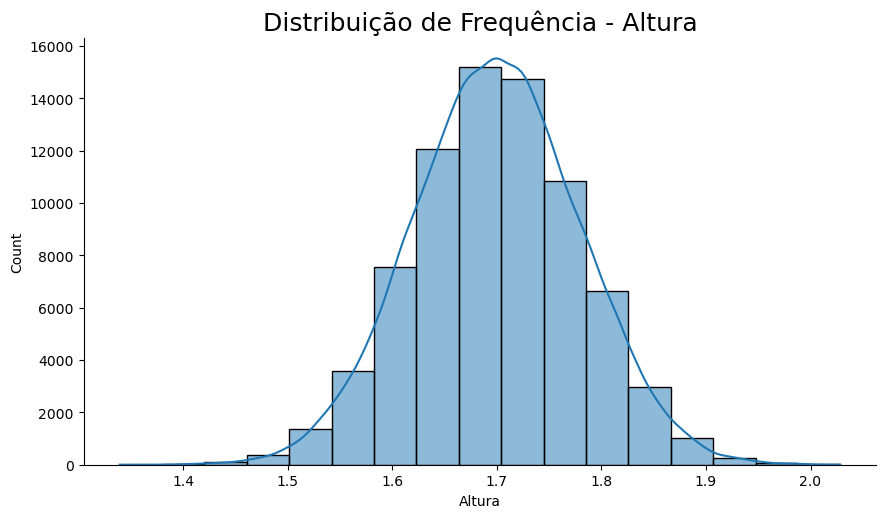

In [17]:
# Histograma da Altura
ax = sns.displot(dados.Altura, kde=True, bins=k)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição de Frequência - Altura", fontsize=18)
plt.show()

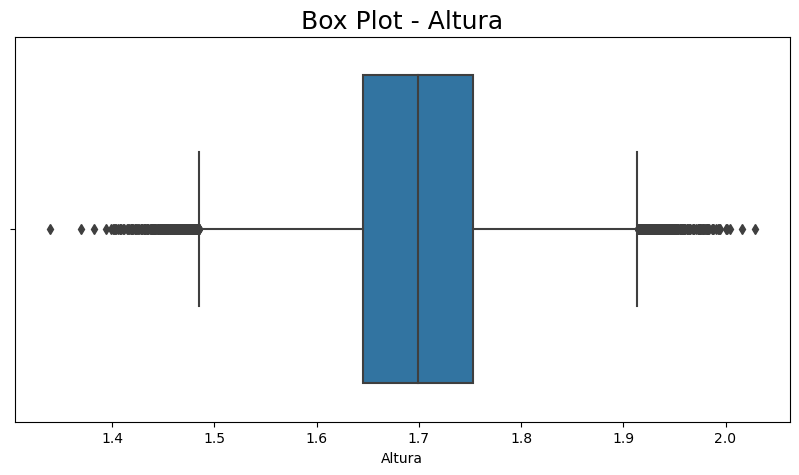

In [18]:
# Box plot da Altura
ax = sns.boxplot(x=dados.Altura, orient="h")

ax.figure.set_size_inches(10, 5)
plt.title("Box Plot - Altura", fontsize=18)
plt.show()

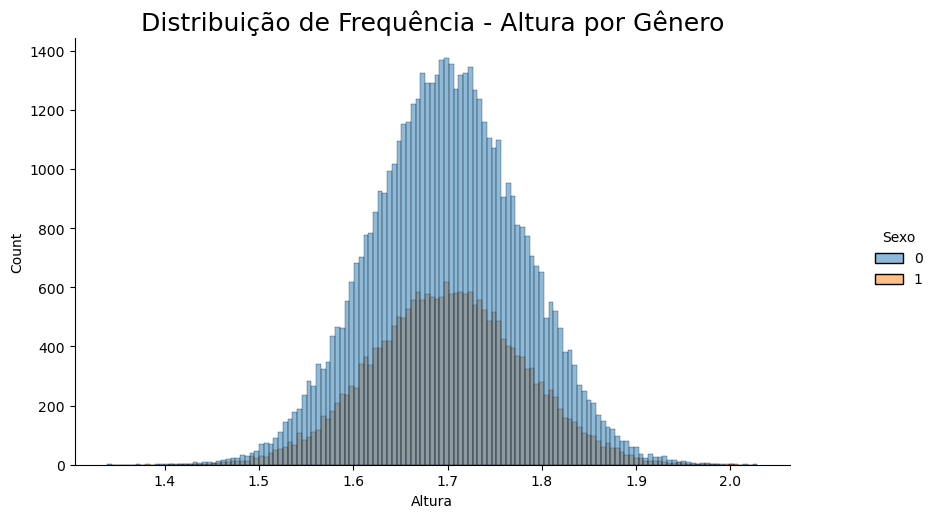

In [19]:
# Hist/KDE Altura por Gênero
ax = sns.displot(dados, x="Altura", hue="Sexo", kind="hist", fill=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição de Frequência - Altura por Gênero", fontsize=18)
plt.show()

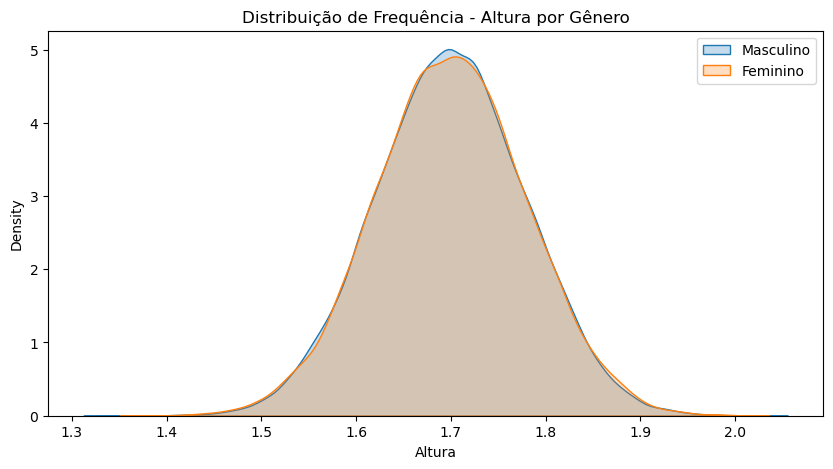

In [20]:
# Hist/KDE Altura por Gênero
plt.figure(figsize=(10, 5))

sns.kdeplot(dados[dados.Sexo==0].Altura, shade=True, label="Masculino")
sns.kdeplot(dados[dados.Sexo==1].Altura, shade=True, label="Feminino")

plt.title("Distribuição de Frequência - Altura por Gênero")
plt.legend()

plt.show()

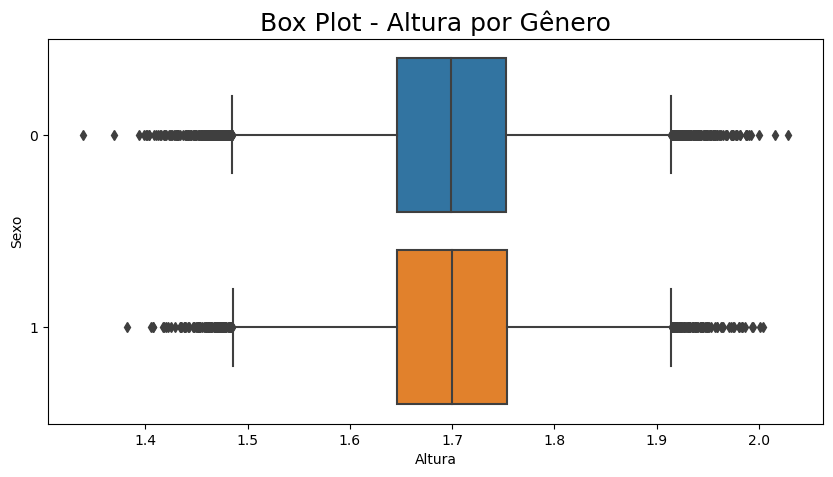

In [21]:
# BoxPlot Altura por Gênero
plt.figure(figsize=(10, 5))
sns.boxplot(x=dados.Altura, y=dados.Sexo, orient="h")

plt.title("Box Plot - Altura por Gênero", fontsize=18)
plt.show()

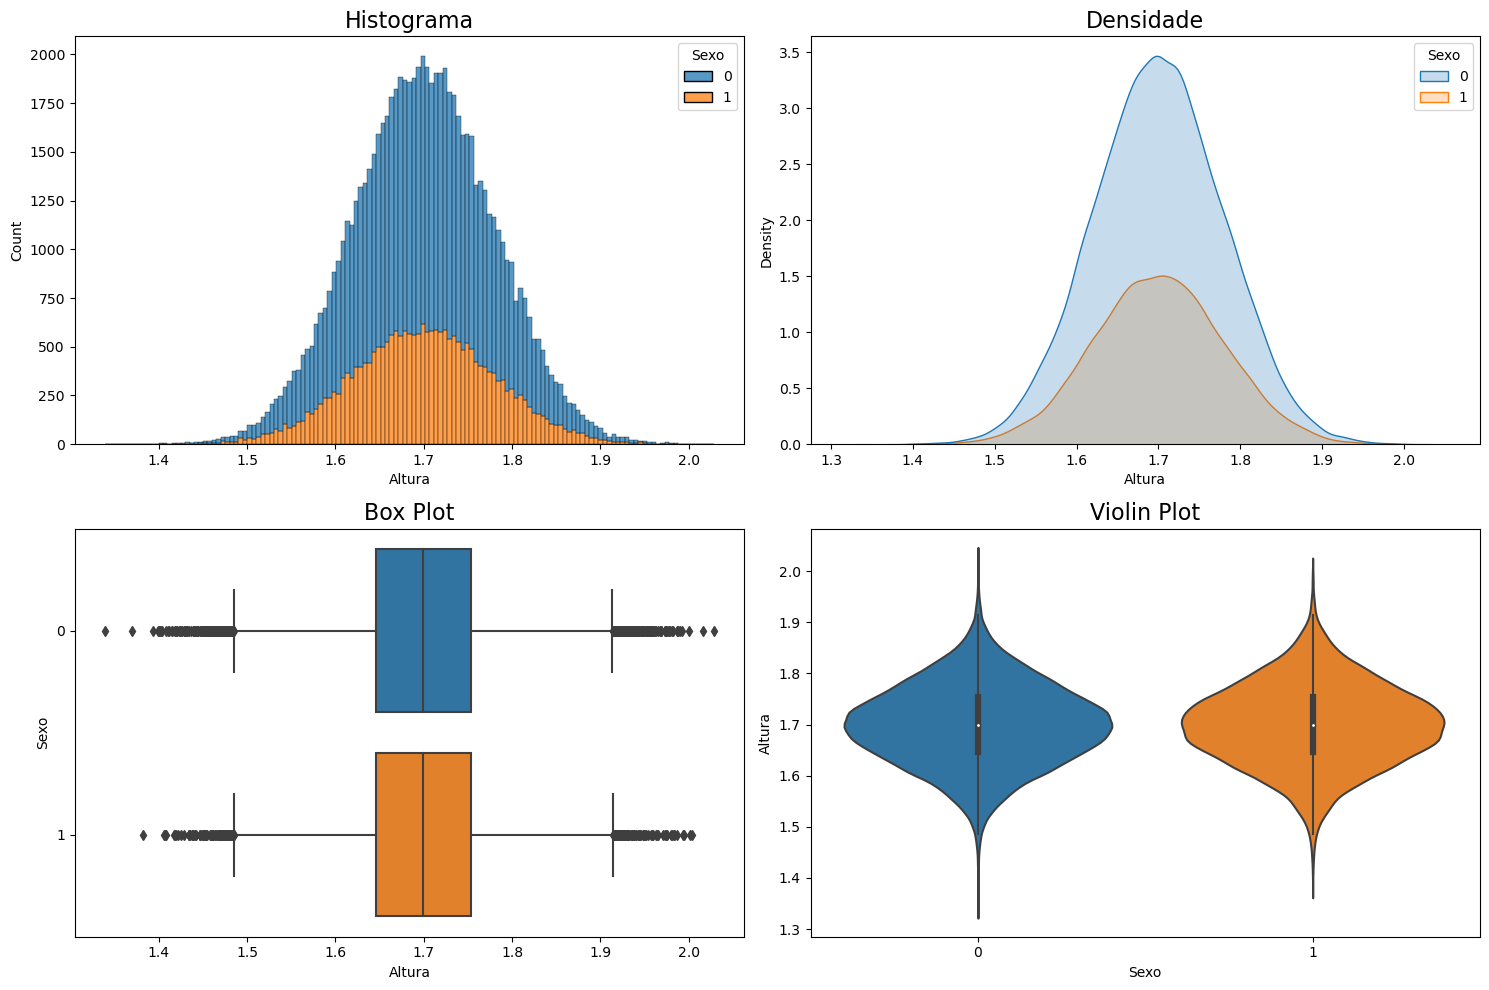

In [22]:
# Tamanho da figura
plt.figure(figsize=(15, 10))

# Histograma
plt.subplot(2, 2, 1)
sns.histplot(dados, x="Altura", hue="Sexo", multiple="stack", kde=False)
plt.title("Histograma", fontsize=16)

plt.subplot(2, 2, 2)
sns.kdeplot(data=dados, x="Altura", hue="Sexo", fill=True)
plt.title("Densidade", fontsize=16)

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=dados.Altura, y=dados.Sexo, orient="h")
plt.title("Box Plot", fontsize=16)

# Violin plot
plt.subplot(2, 2, 4)
sns.violinplot(x=dados.Sexo, y=dados.Altura, orient="v")
plt.title("Violin Plot", fontsize=16)

# Evitar sobreposição
plt.tight_layout()

# Exibir
plt.show()

***

# Dados

In [23]:
# dados
serie = dados.Altura

# <font size = 6> 1.3 - Medidas de Tendência Central - M1</font>

# Média

### Aritmética
## $ \bar{x} = \frac{1}{n}\sum{x_{i}} $

In [24]:
# from scratch
def mean(serie):
    n = len(serie)
    mean = 1 / n * sum(serie)
    
    return mean

In [25]:
mean(serie)

1.6995124540575812

In [26]:
# Pandas
media_aritmetica = serie.mean()

media_aritmetica

1.6995124540575741

In [27]:
# numpy
np.mean(serie)

1.6995124540575741

### Ponderada
## $ \bar{x} = \frac{1}{\sum{f_{i}}}\sum{x_{i}f_{i}} $

A média ponderada é utilizada quando cada elemento do conjunto possui um peso diferente. Nesse caso, cada valor é multiplicado pelo peso correspondente, e a soma desses produtos é dividida pela soma dos pesos.

In [28]:
# create weights
frequencia = pd.value_counts(pd.cut(dados.Altura, bins=5), normalize=True)

weigth_data = pd.DataFrame({"frequency":frequencia})

left_int = [weigth_data.index[i].left for i in range(len(weigth_data.index))]
right_int = [weigth_data.index[i].right for i in range(len(weigth_data.index))]

weigth_data["left_int"], weigth_data["right_int"] = left_int, right_int
weigth_data["mean_int"] = (weigth_data.right_int + weigth_data.left_int) / 2

weigth_data.reset_index(drop=True, inplace=True)

weigth_data

,frequency,left_int,right_int,mean_int
0,0.603722,1.615,1.753,1.6840
1,0.243011,1.753,1.891,1.8220
2,0.142530,1.477,1.615,1.5460
3,0.007991,1.891,2.028,1.9595
4,0.002746,1.339,1.477,1.4080


In [29]:
serie_w = weigth_data.mean_int
weights = weigth_data.frequency

def weigth_avg(serie_w, weights):
    
    avg_w = sum(s * w for s, w in zip(serie_w, weights)) / sum(weights)
    
    return avg_w

In [30]:
weigth_avg(serie_w, weights)

1.6993099817803226

### Geométrica
## $ \bar{G} = \sqrt[n]{\Pi x_{i}} $

A média geométrica é utilizada quando se deseja calcular a média de valores que estão relacionados entre si de forma multiplicativa. Para calcular a média geométrica, é necessário multiplicar todos os valores e extrair a raiz enésima do produto, onde n é a quantidade de elementos.

In [31]:
# from scratch + math
import math

def geo_mean(serie):
    n = len(serie)
    prod = math.prod(serie)
    geo_mean = prod ** (1 / n)
    
    return geo_mean

In [32]:
new_serie = serie.tail()
geo_mean(new_serie)

1.7378563493669157

### Harmônica
## $ \bar{H} = (\frac{1}{n}\sum{x_{i}^{-1}})^{-1} $

A média harmônica é utilizada quando se deseja calcular a média de valores que estão relacionados entre si de forma inversamente proporcional. Para calcular a média harmônica, é necessário calcular o inverso de cada valor, calcular a média aritmética desses inversos e, por fim, calcular o inverso dessa média.

In [33]:
def harm_mean(serie):
    n = len(serie)
    
    inverse = 1 / serie
    harm_mean = n / sum(inverse)
    
    return harm_mean

In [34]:
harm_mean(serie)

1.6957573212247723

In [35]:
# scipy
stats.hmean(serie)

1.6957573212247603

# Mediana

In [36]:
# from scratch
def median(serie):
    n = len(serie)
    
    if len(serie) % 2 == 0:
        center_index = int(n / 2)
        median = (sorted(serie)[center_index] + sorted(serie)[center_index - 1])/2
    else:
        center_index = int(n / 2)
        median = sorted(serie)[center_index]

    return median

In [37]:
median(serie)

1.6993247325

In [38]:
# Pandas
mediana = serie.median()

mediana

1.6993247325

In [39]:
# numpy
np.median(serie)

1.6993247325

## $ med = l_{inf} + \frac{n/2 - f_{ant}}{f_{med}} . A$

# Moda

In [40]:
# Pandas
moda = serie.round(2).mode()[0]

moda

1.7

In [41]:
# scipy
stats.mode(serie.round(2), keepdims=False)[0]

1.7

### Person

## $ mo = 3md - 2\bar{x} $

In [42]:
# Pearson mode
pearson_mode = 3 * mediana - 2 * media_aritmetica

pearson_mode.round(2)

1.7

### King

## $ mo_{king} = L_{inf} + \frac{f_{po}}{f_{ant} + f_{po}} . A$

### Czuber

## $ mo_{czuber} = L_{inf} + \frac{f_{mo} - f_{ant}}{2f_{mo} - f_{ant} - f_{po}} $

---

## <font size = 6>1.4 - Medidas Separatrizes</font>

# Quartis

#### Os quartis dividem nossos dados em 4 partes iguais,cada uma contendo 25% dos dados.

1º Quartil — Retorna 25% da distribuição

2º Quartil — Retorna 50% da distribuição (Mediana)

3º Quartil — Retorna 75% da distribuição

4º Quartil — Retorna 100% da distribuição

## $ Q_{k} = li_{k} + \frac{k/4 - f_{ant}}{f_{k}} . A$

In [43]:
quartil_1 = np.quantile(sorted(serie), 0.25)
quartil_2 = np.quantile(sorted(serie), 0.50)
quartil_3 = np.quantile(sorted(serie), 0.75)

In [44]:
print(f"Primeiro quartil: {quartil_1}")
print(f"Segundo quartil: {quartil_2}")
print(f"Terceiro quartil: {quartil_3}")

Primeiro quartil: 1.645785297
Segundo quartil: 1.6993247325
Terceiro quartil: 1.75306238275


Q1 - 25% das pessoas da amostra medem até 1.64m.

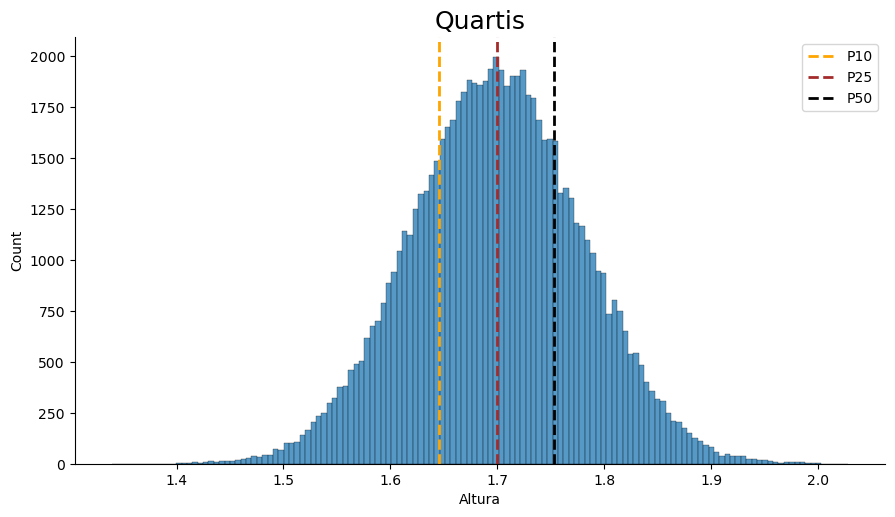

In [45]:
# Plot percentis
ax = sns.displot(serie, kind="hist", fill=True)

ax.figure.set_size_inches(10, 5)
plt.title("Quartis", fontsize=18)

plt.axvline(quartil_1, color='orange', linestyle='dashed', linewidth=2, label='P10')
plt.axvline(quartil_2, color='brown', linestyle='dashed', linewidth=2, label='P25')
plt.axvline(quartil_3, color='black', linestyle='dashed', linewidth=2, label='P50')
plt.legend()

plt.show()

# Percentis

#### Um percentil corresponde a cada parte de um conjunto de dados divididos em cem partes ordenadas da menor para a maior.

## $ P_{k} = li_{k} + \frac{k/100 - f_{ant}}{f_{k}} . A$

In [46]:
percentile_10 = np.percentile(sorted(serie), 10)
percentile_25 = np.percentile(sorted(serie), 25)
percentile_50 = np.percentile(sorted(serie), 50)
percentile_75 = np.percentile(sorted(serie), 75)
percentile_99 = np.percentile(sorted(serie), 99)

In [47]:
print(f"Percentil 10: {percentile_10}")
print(f"Percentil 25: {percentile_25}")
print(f"Percentil 50: {percentile_50}")
print(f"Percentil 75: {percentile_75}")
print(f"Percentil 99: {percentile_99}")

Percentil 10: 1.5977404519
Percentil 25: 1.645785297
Percentil 50: 1.6993247325
Percentil 75: 1.75306238275
Percentil 99: 1.88412506361


P10 - 10% das pessoas da amostra medem até 1.59m.

P99 - 99% das pessoas da amostra medem até 1.88m.

P99 - 1% das pessoas da amostra medem acima 1.88m.

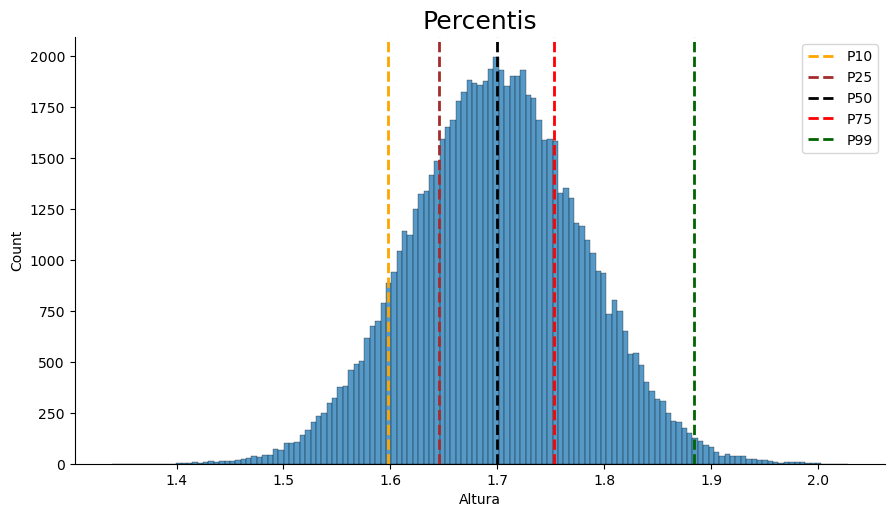

In [48]:
# Plot percentis
ax = sns.displot(serie, kind="hist", fill=True)

ax.figure.set_size_inches(10, 5)
plt.title("Percentis", fontsize=18)

plt.axvline(percentile_10, color='orange', linestyle='dashed', linewidth=2, label='P10')
plt.axvline(percentile_25, color='brown', linestyle='dashed', linewidth=2, label='P25')
plt.axvline(percentile_50, color='black', linestyle='dashed', linewidth=2, label='P50')
plt.axvline(percentile_75, color='red', linestyle='dashed', linewidth=2, label='P75')
plt.axvline(percentile_99, color='darkgreen', linestyle='dashed', linewidth=2, label='P99')
plt.legend()

plt.show()

---

## <font size = 6> 1.5 - Medidas de Dispersão - M2</font>

# Amplitude

## $ A  = x_{n} - x_{1} $

In [49]:
# ampplitude
def amplitude(serie):
    
    return sorted(serie)[-1] - sorted(serie)[0]

In [50]:
amplitude(serie)

0.6892521509999998

# Desvio Médio

# $ dm = \frac{1}{n}\sum{|x_{i} - \bar{x}|} $

In [51]:
def absolute_mean_deviation(serie):
    n = len(serie)
    mean = serie.mean()
    
    mean_deviation = 1 / n * sum(abs(serie - mean))
    
    return mean_deviation

In [52]:
absolute_mean_deviation(serie)

0.06360072857483194

# Variância

## $ \sigma_{populacional}^2 = \frac{1}{n}\sum{(x_{i} - \bar{x})^2} $

## $ \sigma_{amostral}^2 = \frac{1}{n - 1}\sum{(x_{i} - \bar{x})^2} $

In [53]:
def variance(serie, pop=False):
    
    """
    
    pop = False retorna a variância amostral, enquanto pop = True retorna a variância populacional.
    
    """
    
    n = len(serie)
    mean = serie.mean()
    
    if pop == False:
        variance = 1 / (n - 1) * sum((serie - mean) ** 2)
    elif pop == True:
        variance = 1 / n * sum((serie - mean) ** 2)
    else:
        variance = "pop must be True or False"
        
    return variance

In [54]:
# Variance from scrath
variance(serie, pop=False)

0.006354868656686803

In [55]:
# pandas - amostral por padrão
serie.var()

0.006354868656686821

In [56]:
# Numpy - populacional por padrão
np.var(serie)

0.0063547859540754635

In [57]:
# Numpy - degrees of freedoom=1 para variância amostral
np.var(serie, ddof=1)

0.006354868656686821

# Desvio-Padrão

## $ \sigma = \sqrt{\sigma^2} $

In [58]:
def standard_deviation(serie, pop=False):
    
    """
    
    pop = False retorna o desvio-padrão amostral, enquanto pop = True retorna o desvio-padrão populacional.
    
    """
    
    n = len(serie)
    mean = serie.mean()
    
    if pop == False:
        variance = 1 / (n - 1) * sum((serie - mean) ** 2)
    elif pop == True:
        variance = 1 / n * sum((serie - mean) ** 2)
    else:
        variance = "pop must be True or False"
        
    return variance ** (1/2)

In [59]:
standard_deviation(serie, pop=True)

0.07971691134304844

In [60]:
# pandas - amostral por padrão
serie.std()

0.07971743006825309

In [61]:
# numpy - populacional por padrão
np.std(serie)

0.07971691134304855

In [62]:
# Numpy - degrees of freedoom =1 para desvio-padrão amostral
np.std(serie, ddof=1)

0.07971743006825309

---

## <font size = 6> 1.6 - Medidas de Assimetria - M3</font>

https://www.datacamp.com/pt/tutorial/understanding-skewness-and-kurtosis

## $$ assimetria = \frac{n}{(n-1)(n-2)}\sum{(\frac{x_{i}-\bar{x}}{\sigma})^3} $$

<img src=https://lineu96.github.io/npest/npest2_2_files/figure-html/unnamed-chunk-8-1.png>

In [63]:
# Assimetria from scratch
def moment_skew(serie):
    n = len(serie)
    mean = np.mean(serie)
    std = np.std(serie)
    
    n_part = n / ((n - 1) * (n - 2))
    num_part = np.sum(((serie - mean) / std) ** 3)
    
    skewness = n_part * num_part
    
    return skewness

In [64]:
# From scratch
moment_skew(dados.Altura)

0.003944697023886042

In [65]:
# Pandas
dados.Altura.skew()

0.003944620019379492

In [66]:
# scipy 
stats.skew(dados.Altura)

0.003944543015708045

## <font size = 6> 1.7 - Medidas de Curtose - M4</font>

https://www.datacamp.com/pt/tutorial/understanding-skewness-and-kurtosis

## $$ curtose = \frac{1}{n}\sum{(\frac{x_{i}-\bar{x}}{\sigma})^4 - 3} $$

<img src=https://blog.proffernandamaciel.com.br/wp-content/uploads/2022/05/unnamed-7-768x475.png width=70%>

In [67]:
# From scratch
def moment_kurt(serie):
    n = len(serie)
    mean = np.mean(serie)
    std = np.std(serie)
    
    kurtosis = (1 / n) * sum(((serie - mean) / std) ** 4) - 3
    
    return kurtosis

In [68]:
# From scratch
moment_kurt(dados.Altura)

0.000131972803903313

In [69]:
# Scipy
stats.kurtosis(dados.Altura)

0.00013197280395393918

***

## <font size = 7> 2 - Distribuição de Probabilidades</font>

### 2.1 - Disribuições Discretas
   * Uniforme
   * Bernoulli
   * Binomial
   * Geométrica
   * Geométrica negativa
   * Binomial Negativa
   * Hipergeométrica
   * Poisson
   
### 2.2 - Distribuições Contínuas
   * Exponencial
   * Gamma
   * Weibull
   * Normal
   * t-student
   * LogNormal
   * Chi-Quadrado
   * F-Snedecor

## <font size = 6> 2.1 - Distribuições Discretas</font>

# Uniforme

**Cada um dos n valores em suas faixas tem a mesma probabilidade.**

* Qtde finita de valores possíveis
* Equiprováveis

## $$f(N) = \frac{1}{N}$$

Onde:

$N$ = Espaço Amostral

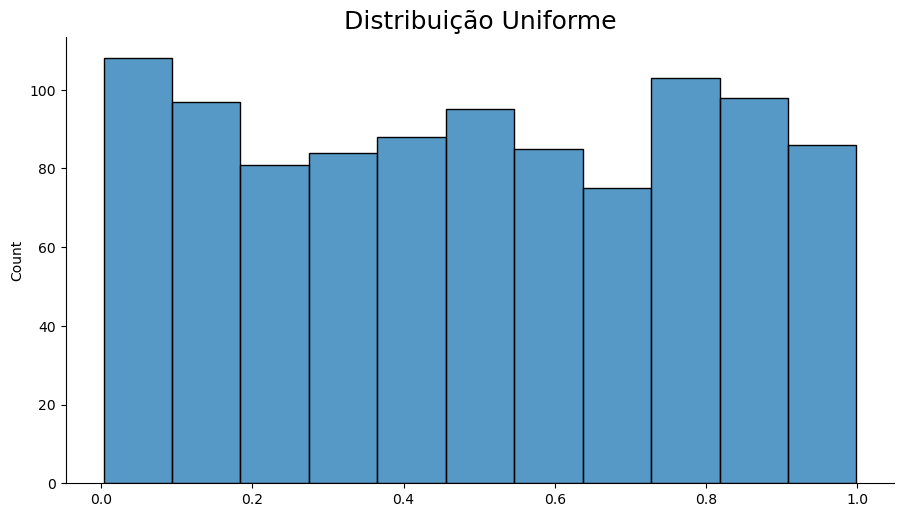

In [70]:
# Histograma + Scipy
size = 1000

uniform = stats.uniform.rvs(size=1000)
bins = sturges_bins(len(uniform))

ax = sns.displot(uniform)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Uniforme", fontsize=18)
plt.show()

# Bernoulli

**Número de sucesos em UM evento.**

* Evento único
* Dicotômicos
* Independentes
* Equiprováveis

## $$f(k)=p^k (1-p)^{1-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$k$ = número de eventos desejados que tenham sucesso

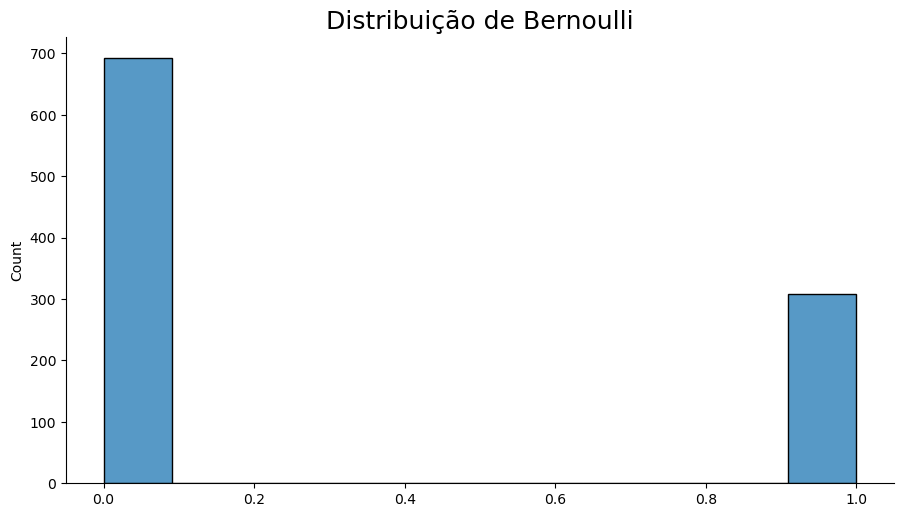

In [71]:
# Histograma + Scipy
size = 1000
p = 0.3

bernoulli = stats.bernoulli.rvs(p, size=1000)
bins = sturges_bins(len(bernoulli))

ax = sns.displot(bernoulli)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição de Bernoulli", fontsize=18)
plt.show()

# Binomial

**Número de sucessos em N eventos.**

Ensaio de Bernoulli repetido n vezes. Binomial com n=1 é Bernoulli.

* Qtde fixa de eventos
* Dicotômicos
* Independentes
* Equiprováveis

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.


# $$f(k, n)=\binom{n}{k} p^k (1-p)^{n-k}$$
### $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

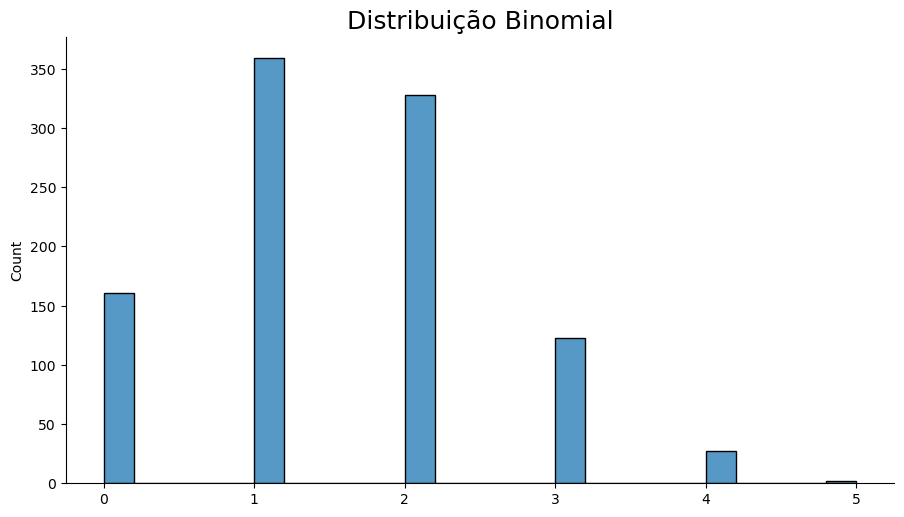

In [72]:
# Histograma
size = 1000
n, p = 5, 0.3

binomial = stats.binom.rvs(n, p, size=1000)
bins = sturges_bins(len(binomial))

ax = sns.displot(binomial)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Binomial", fontsize=18)
plt.show()

In [24]:
# Exemplo loteria
from scipy.special import comb

combinacoes = comb(60, 6)
prob = 1/combinacoes

print(f'Probalidade de ganhar na Mega Sena com um jogo: {prob:0.15f}')

Probalidade de ganhar na Mega Sena com um jogo: 0.000000019974489


In [25]:
# Exemplo loteria
from scipy.special import comb

combinacoes = comb(60, 6)
prob = 1/combinacoes

k, n, p = 1, 10, prob

prob_binom = stats.binom.pmf(k, n, p)
print(f'Probalidade de ganhar na Mega Sena com 10 jogos: {prob_binom:0.15f}')

Probalidade de ganhar na Mega Sena com 10 jogos: 0.000000199744850


In [35]:
# Exemplo cara ou coroa. Qual a probalidade de sair coroa duas vezes em 4 lançamentos
from scipy import stats

k, n, p = 2, 4, 0.5

prob_binom = stats.binom.pmf(k, n, p)
print(f'A probalidade de sair coroa duas vezes em 4 lançamentos é de {prob_binom:0.2%}')

A probalidade de sair coroa duas vezes em 4 lançamentos é de 37.50%


In [27]:
# Exemplo lançamento de dado
from scipy import stats

k, n, p = 3, 10, 1/6

prob_binom = stats.binom.sf(k, n, p)
print(f'Probalidade de sair a face 5 pelo menos 3 vezes em 10 lançamentos: {prob_binom:0.2%}')

Probalidade de sair a face 5 pelo menos 3 vezes em 10 lançamentos: 6.97%


In [30]:
# Em um evento, onde 60% dos participantes são mulheres , serão fornmadas 30 equipes com 12 integrantes. 
# Quantas equipes  deverão ser formadas por 8 mulheres.
from scipy import stats

k, n, p = 8, 12, 0.6
num_equipes = 30

prob_binom = stats.binom.pmf(k, n, p)
equipes = num_equipes * prob_binom
print(f'Serão formadas em média {equipes:0.2f} com 8 mulheres.')

Serão formadas em média 6.39 com 8 mulheres.


In [39]:
# Olhos azuis. Se a probabilidae de nascer com olhos azuis é de 22%, em 50 famímilas, com 3 crianças cada,
# quantas podemos esperar que tenham 2 filhos com olhos azuis.
from scipy import stats

k, n, p = 2, 3, 0.22
num_familias = 50

prob_binom = stats.binom.pmf(k, n, p)
equipes = num_familias * prob_binom
print(f'Entre as 50 famílias, em média {equipes:0.2f} terão dois filhos com olhos azuis.')

Entre as 50 famílias, em média 5.66 terão dois filhos com olhos azuis.


# Geométrica FS

**Número de Falhas até que o primeiro sucesso seja obtido.**

Binomial sem número finito de eventos.
Zero incluso no domnínio, pois o sucesso pode ocorrer no primeiro evento.

* Qtde infinita de eventos
* Dicotômicos
* Independentes
* Equiprováveis

## $$f(k)=p (1-p)^{k-1}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$k$ = número de eventos desejados que tenham sucesso

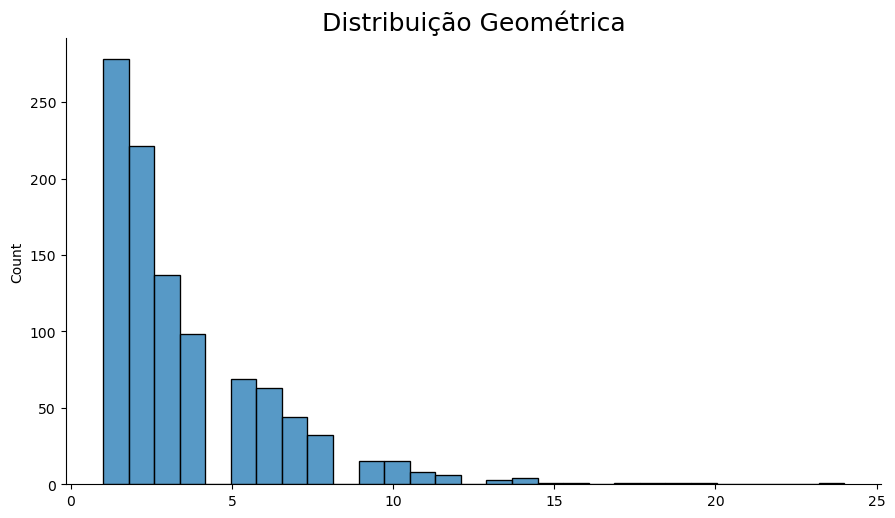

In [73]:
# Histograma + Scipy
size = 1000
p = 0.3

geom = stats.geom.rvs(p, size=1000)
bins = sturges_bins(len(geom))

ax = sns.displot(geom)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Geométrica", fontsize=18)
plt.show()

# Geométrica TS

**Número de Tentativas até que o Primeiro sucesso seja obtido.**

Binomial sem número finito de eventos. Sem Zero no domnínio, pois um evento precisa ocorrer.

* Qtde infinita de eventos
* Dicotômicos
* Independentes
* Equiprováveis

## $$f(k)=p (1-p)^{k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$k$ = número de eventos desejados que tenham sucesso

# Binomial Negativa

**Número de Tentativas até que X sucessos sejam obtidos.**

Generalização da Geométrica TS. Se r=1 é Geométrica TS.

* Qtde infinita de eventos
* Dicotômicos
* Independentes
* Equiprováveis

# $$f(k, n)=\binom{k+n-1}{n-1} p^n (1-p)^{k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

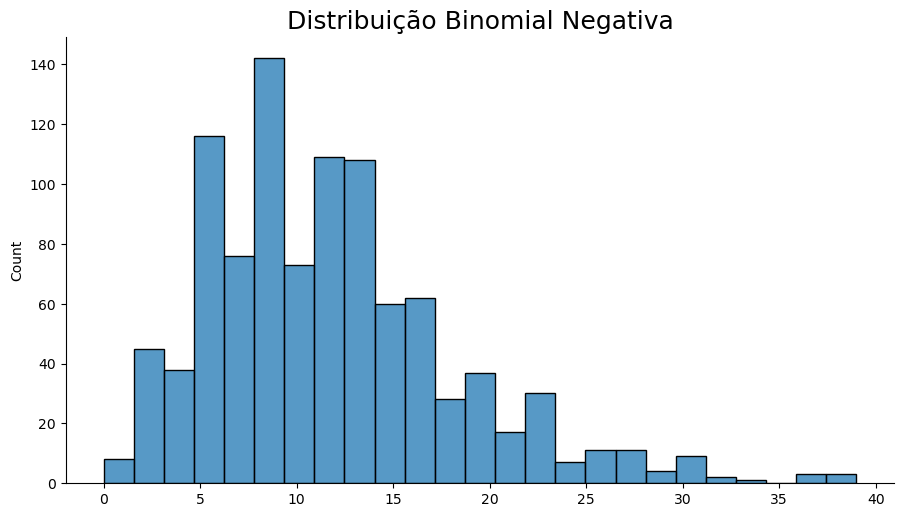

In [74]:
# Histograma + Scipy
size = 1000
n, p = 5, 0.3

n_binomial = stats.nbinom.rvs(n, p, size=1000)
bins = sturges_bins(len(n_binomial))

ax = sns.displot(n_binomial)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Binomial Negativa", fontsize=18)
plt.show()

# Hipergeométrica

**Número de sucessos em um modelo Binomial sem reposição**

Modelo exato para amostragem sem reposição. Se M = ∞ é Binomial.

* Qtde infinita de eventos
* Dicotômicos
* Independentes
* Não Equiprováveis

## $$f(k,M,n,N) = \frac{\binom{n}{k}\binom{M-n}{N-k}}{\binom{M}{N}}$$

Onde:

$M$ = População

$N$ = Amostra

$n$ = atributo A (sucesso)

$k$ = Probabilidade de k elementos de A

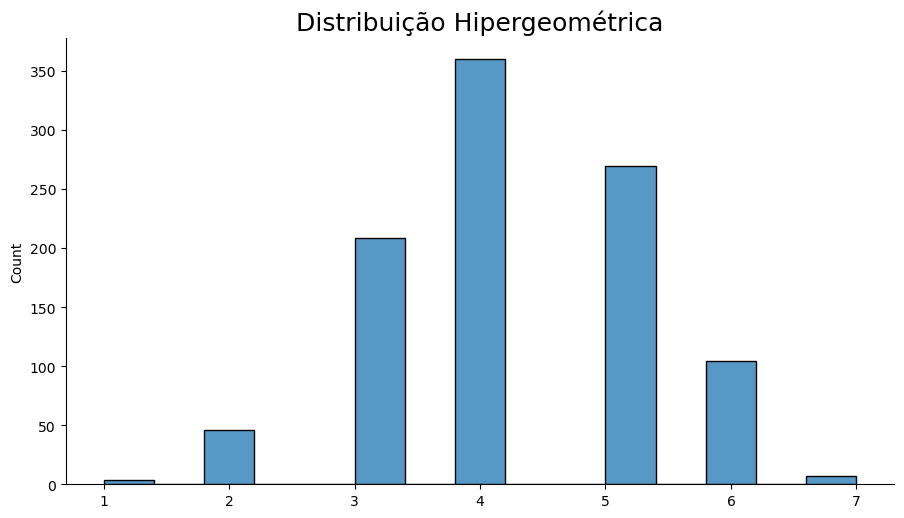

In [75]:
# Histograma + Scipy
size = 1000
n, p = 5, 0.3
[M, n, N] = [20, 7, 12]

hypergeom = stats.hypergeom.rvs(M, n, N, size=1000)
bins = sturges_bins(len(hypergeom))

ax = sns.displot(hypergeom)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Hipergeométrica", fontsize=18)
plt.show()

# Poisson

**Número de sucessos em um intervalo.**

Número de eventos cresce enquanto a média é constante.
Se n = ∞ é Binomial.

* A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.
* O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.
* A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\lambda}(\lambda)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\lambda$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

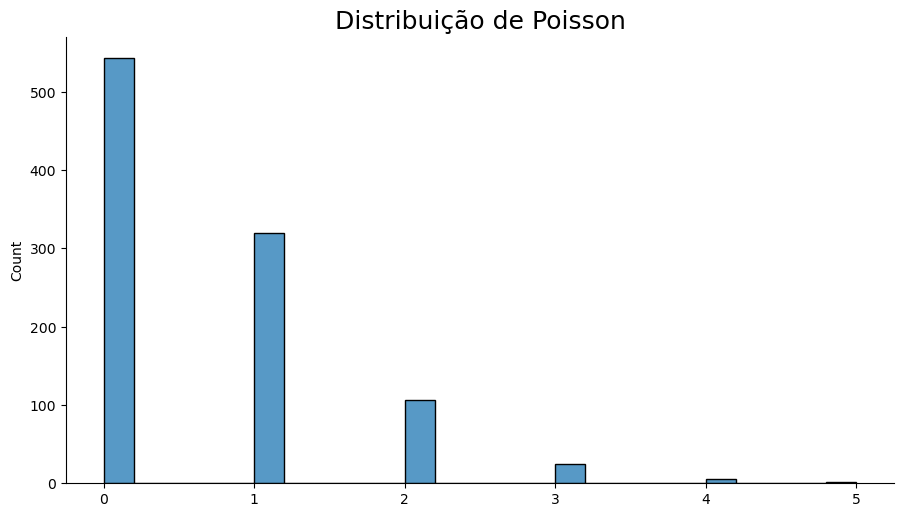

In [76]:
# Histograma
size = 1000
mu = 0.6

poisson = stats.poisson.rvs(mu, size=1000)
bins = sturges_bins(len(poisson))

ax = sns.displot(poisson)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição de Poisson", fontsize=18)
plt.show()

***

## <font size = 6> 2.2 - Distribuições Contínuas</font>

# Exponencial

**Intervalo entre duas contagens de Poisson.**

Possui a característica de falta de memória.

## $$f(x,\lambda) = \lambda e^{-\lambda x}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\lambda$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$x$ = número de sucessos no intervalo desejado

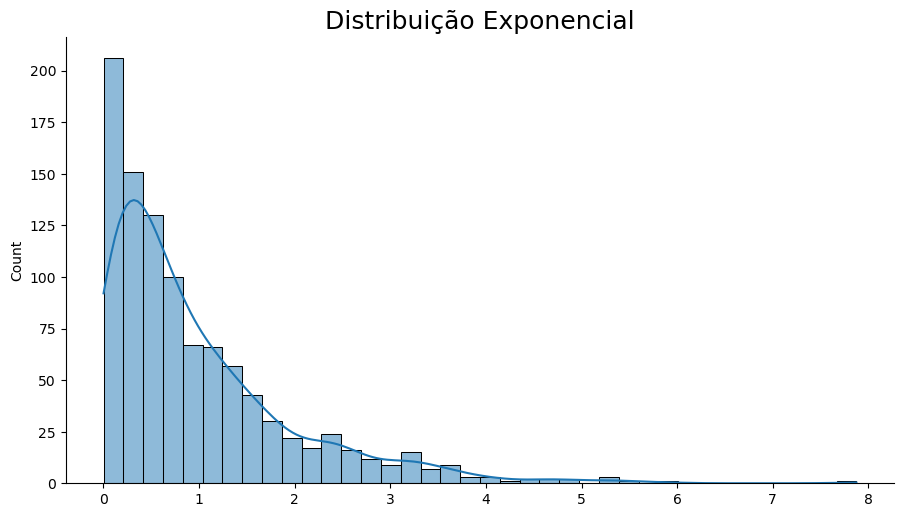

In [77]:
# Histograma + Scipy
size = 1000
exp = stats.expon.rvs(size=size)
bins = sturges_bins(len(exp))

ax = sns.displot(exp, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Exponencial", fontsize=18)
plt.show()

# Gamma

**Intervalo até que α contagens ocorram em Poisson.**

Generalização da Exponencial.

* $\alpha = 1$ tem-se a distribuição exponencial
* $\alpha = n/2$ , $n$ inteiro e $\beta=1/2$ tem-se a distribuição chi-quadrado com n graus de liberdade.

## $$f(x,\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1} e^{-\beta x}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\beta$ = é o parâmetro de escala

$\alpha$ = é o parâmetro de forma


$\Gamma$ = função Gamma   
#### $\Gamma(\alpha) = \int_{0}^{+\inf} x^{\alpha-1} e^{-x}dx$

$x$ = número de sucessos no intervalo desejado

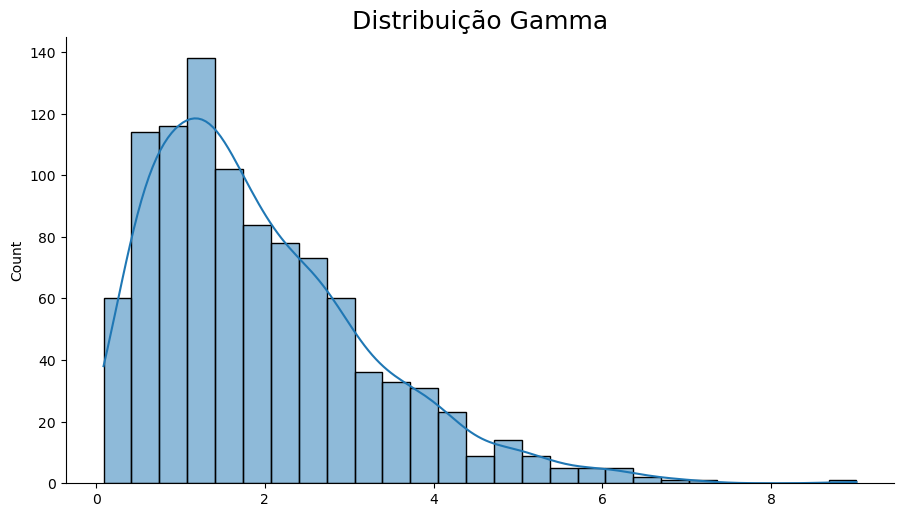

In [78]:
# Histograma + Scipy
size = 1000
alpha = 1.99
gamma = stats.gamma.rvs(a=alpha, size=size)
bins = sturges_bins(len(gamma))

ax = sns.displot(gamma, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Gamma", fontsize=18)
plt.show()

# Weibull

**Intervalo até a falha.**

## $$f(x,\alpha) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha-1} e^{-(\frac{x}{\beta})^\alpha}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\beta$ = é o parâmetro de escala

$\alpha$ = é o parâmetro de forma

$x$ = número de sucessos no intervalo desejado

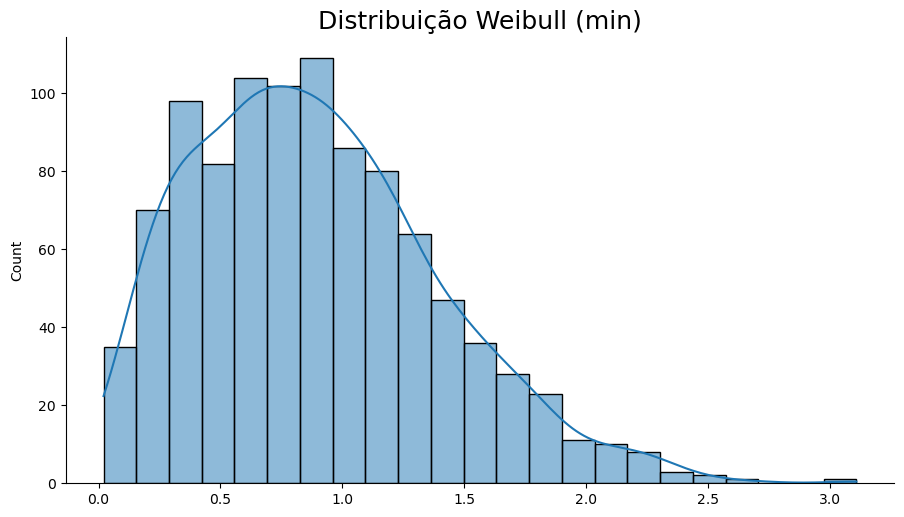

In [79]:
# Histograma + Scipy
size = 1000
c = 1.79
weibull = stats.weibull_min.rvs(c=c, size=size)
bins = sturges_bins(len(weibull))

ax = sns.displot(weibull, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Weibull (min)", fontsize=18)
plt.show()

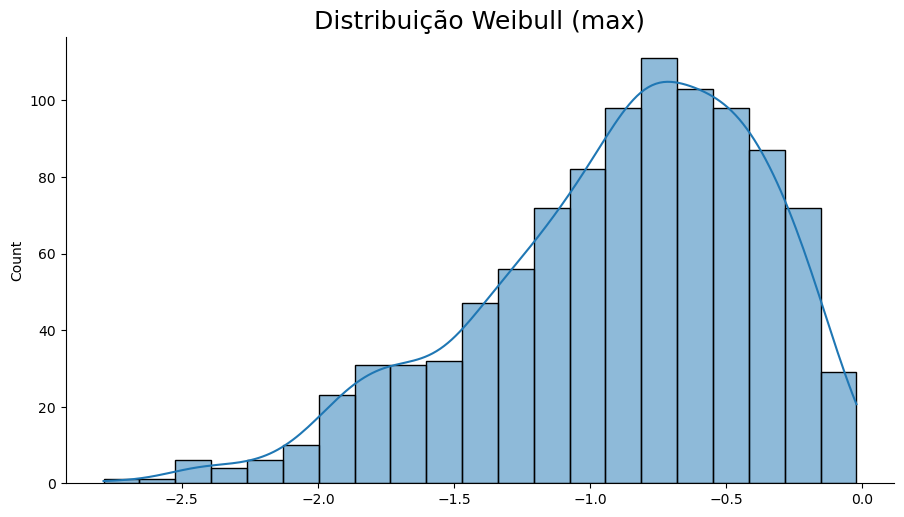

In [80]:
# Histograma + Scipy
size = 1000
c = 1.79
weibull = stats.weibull_max.rvs(c=c, size=size)
bins = sturges_bins(len(weibull))

ax = sns.displot(weibull, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Weibull (max)", fontsize=18)
plt.show()

# Normal

A distribuição normal é uma das distribuições mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável apresenta a forma de sino, sendo simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

In [81]:
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


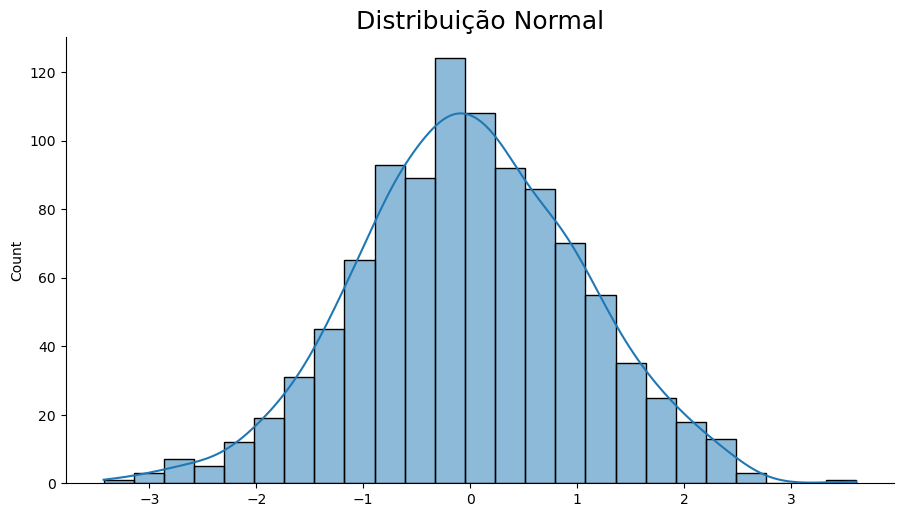

In [82]:
# Histograma + Scipy
size = 1000
normal = stats.norm.rvs(size=size)
bins = sturges_bins(len(normal))

ax = sns.displot(normal, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Normal", fontsize=18)
plt.show()

# T-Student

## $$f(x,v) = \frac{\Gamma((v + 1)/2)}{\sqrt{\pi v}\Gamma(v/2)}(1 + x^2/v)^{-(v+1)/2}$$

Onde:

### Tabela $t$ de Student

In [83]:
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1   6.313752  7.026366  7.915815  9.057887   
                           2   2.919986  3.103977  3.319764  3.578247   
                           3   2.353363  2.470807  2.605427  2.762599   
                           4   2.131847    2.2261  2.332873  2.455892   
                           5   2.015048  2.097837  2.190958  2.297392   
                           6    1.94318  2.019201  2.104306  2.201059   
                           7   1.894579  1.966153  2.046011  2.136453   
                           8   1.859548  1.927986  2.004152  2.090166   
                           9   1.833113  1.899222  1.972653  2.055395   
                           10  1.812461  1.876774  1.948099  2.028327   
                           11  1.795885  1.858772  1.928427  2.006663   
                           12  1.782288  1.844015  1.912313  1.988934   
                           13  1.770933    1.8317  1.898874  1.974158   
                           14   1.76131  1.821267  1.887496  1.961656   
                           15   1.75305  1.812316  1.877739   1.95094   
                           16  1.745884  1.804553  1.869279  1.941654   
                           17  1.739607  1.797755  1.861875   1.93353   
                           18  1.734064  1.791754   1.85534  1.926362   
                           19  1.729133  1.786417   1.84953  1.919992   
                           20  1.724718   1.78164  1.844331  1.914292   
                           21  1.720743  1.777339  1.839651  1.909164   
                           22  1.717144  1.773447  1.835417  1.904524   
                           23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   
                           26  1.705618  1.760983  1.821863  1.889682   
                           27  1.703288  1.758466  1.819126  1.886686   
                           28  1.701131  1.756134  1.816592  1.883912   
                           29  1.699127  1.753968  1.814238  1.881336   
                           30  1.697261  1.751952  1.812047  1.878938   

Bicaudal                           0.060      0.050      0.040      0.030  \
Unicaudal                          0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1   10.578895  12.706205  15.894545  21.204949   
                           2    3.896425   4.302653   4.848732   5.642778   
                           3     2.95051   3.182446   3.481909   3.896046   
                           4    2.600762   2.776445   2.998528    3.29763   
                           5    2.421585   2.570582   2.756509   3.002875   
                           6    2.313263   2.446912   2.612242   2.828928   
                           7    2.240879   2.364624   2.516752   2.714573   
                           8    2.189155   2.306004   2.448985   2.633814   
                           9    2.150375   2.262157   2.398441   2.573804   
                           10   2.120234   2.228139   2.359315   2.527484   
                           11   2.096139   2.200985    2.32814   2.490664   
                           12   2.076441   2.178813   2.302722     2.4607   
                           13   2.060038   2.160369   2.281604   2.435845   
                           14   2.046169   2.144787   2.263781   2.414898   
                           15   2.034289    2.13145    2.24854   2.397005   
                           16      2.024   2.119905   2.235358   2.381545   
                           17   2.015002   2.109816   2.223845   2.368055   
                           18   2.007067   2.100922   2.213703    2.35618   
                           19   2.000017   2.093024   2.204701   2.345648   
                           20   1.993713   2.0

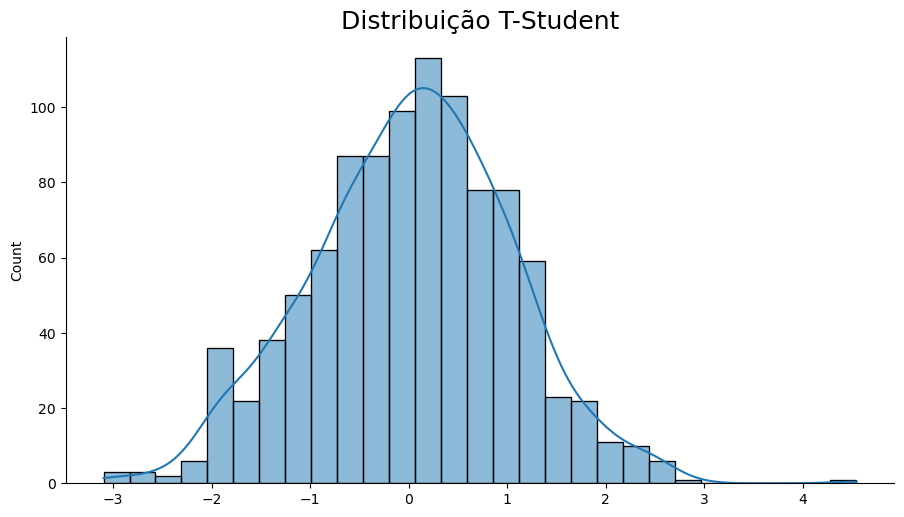

In [84]:
# Histograma + Scipy
size = 1000
t = stats.t.rvs(size=size, df=size-2)
bins = sturges_bins(len(t))

ax = sns.displot(t, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição T-Student", fontsize=18)
plt.show()

## Distribuição Normal x -Student

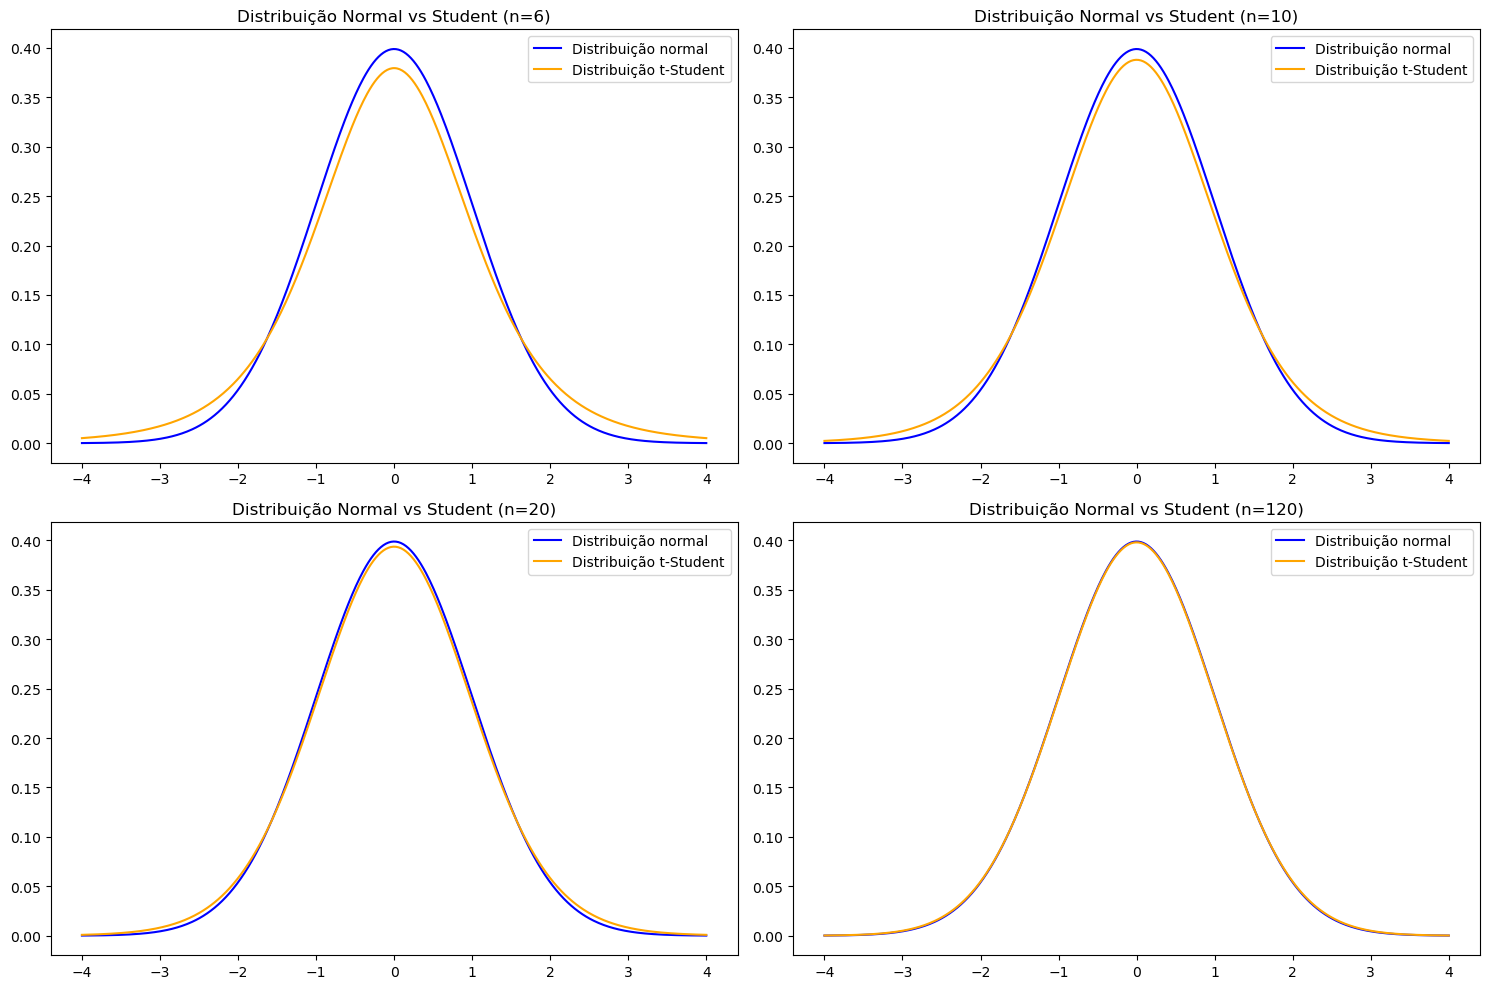

In [85]:
# Tamanhos de amostra para comparar
sample_sizes = [6, 10, 20, 120]

plt.figure(figsize=(15, 10))

for i, size in enumerate(sample_sizes, 1):
    
    # Normal distribution
    x = np.linspace(-4, 4, 500)
    normal_pdf = stats.norm.pdf(x)

    # T distribution
    df = size-1
    t_pdf = stats.t.pdf(x, df=df)

    # plot
    plt.subplot(2, 2, i)
    sns.lineplot(x=x, y=normal_pdf, label="Distribuição normal", color='blue')
    sns.lineplot(x=x, y=t_pdf, label="Distribuição t-Student", color='orange')
    
    plt.title(f"Distribuição Normal vs Student (n={size})")
    plt.legend()

plt.tight_layout()
plt.show()

# Lognormal

## $$f(x,s) = \frac{1}{sx\sqrt{2\pi}}\exp({-\frac{log^2(x)}{2s^2}})$$

Onde:

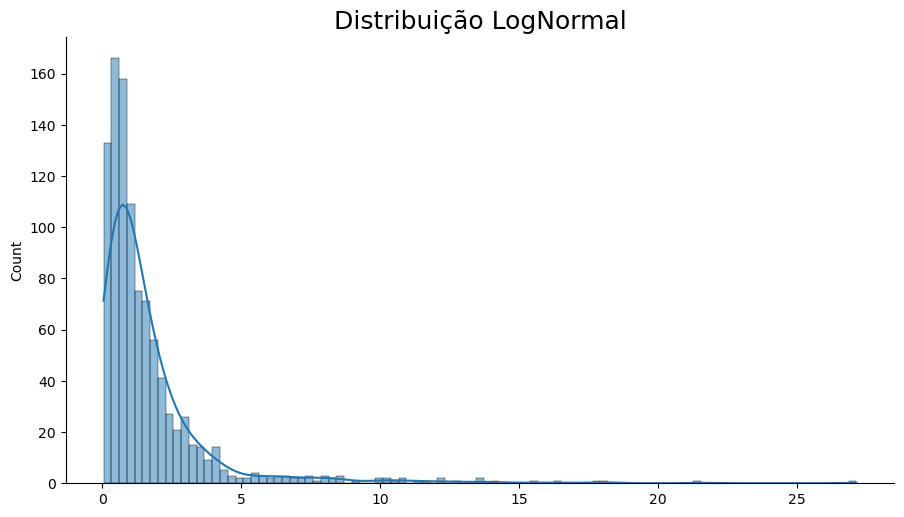

In [86]:
# Histograma + Scipy
s = 1 # std
size=1000

lognormal = stats.lognorm.rvs(s, size=size)
bins = sturges_bins(len(lognormal))

ax = sns.displot(lognormal, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição LogNormal", fontsize=18)
plt.show()

# Chi-Quadrado

## $$f(x,k) = \frac{1}{2^{k/2} \Gamma{(k/2)}}x^{k/2-1} \exp(-x/2)$$

Onde:

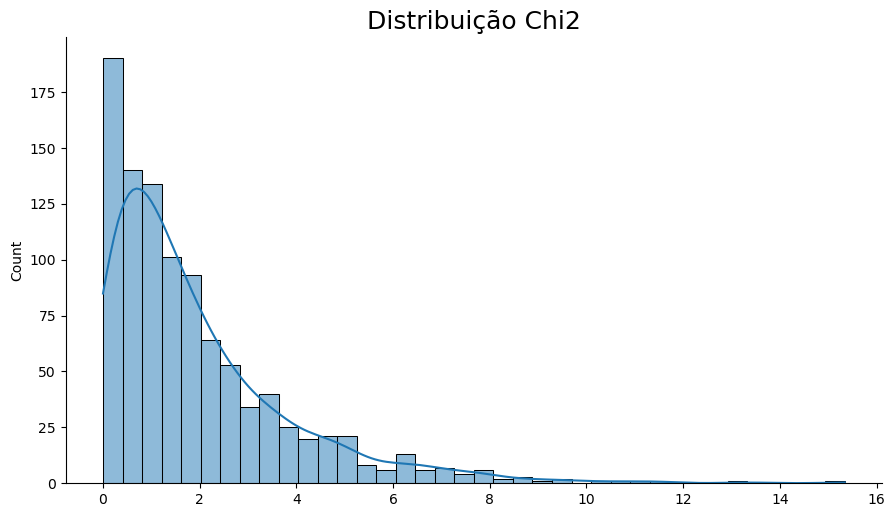

In [87]:
# Histograma + Scipy
size=1000
df=2

chi = stats.chi2.rvs(df=df, size=size)
bins = sturges_bins(len(chi))

ax = sns.displot(chi, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição Chi2", fontsize=18)
plt.show()

# F-Snedecor

## $$f(x, df_{1}, df_{2}) = \frac{df2^{df2/2}df1^{df1/2}x^{df1/2-1}}{}$$

Onde:

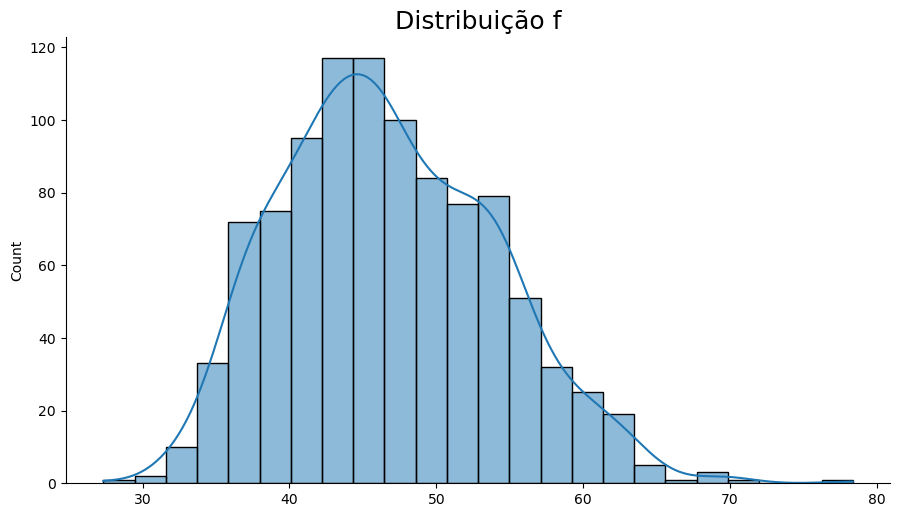

In [88]:
# Histograma + Scipy
dfn, dfd = 29, 18

f = stats.chi2.rvs(dfn, dfd, size=size)
bins = sturges_bins(len(f))

ax = sns.displot(f, kde=True)

ax.figure.set_size_inches(10, 5)
plt.title("Distribuição f", fontsize=18)
plt.show()

***

## <font size = 6> 2.3 - Distribuição Conjunta</font>

## Covariância

In [89]:
# Pandas
dados[['Anos de Estudo', 'Renda']].cov()

,Anos de Estudo,Renda
Anos de Estudo,20.610957,5.011485e+03
Renda,5011.484594,1.104491e+07


In [90]:
# Numpy
np.cov(dados['Anos de Estudo'], dados['Renda'])

array([[2.06109565e+01, 5.01148459e+03],
       [5.01148459e+03, 1.10449060e+07]])

In [91]:
# From scratch
def covariance(x, y):
    n = len(x)
    
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    
    dif_x = x - mean_x
    dif_y = y - mean_y
    
    sum_values = sum(dif_x * dif_y)
    covariance = sum_values / (n - 1)
    
    return covariance

In [92]:
covariance(dados['Anos de Estudo'], dados['Renda'])

5011.484594236158

## Correlação

A correlaçao é uma valor admensional resultante da padronização da covariância que varia entre -1 e 1 indicando a direção e itensidade da relação linear existente entre duas variávies, onde -1 indica uma relação linear negativa perfeita, 0 indica ausência de relação linear e 1 indica um relacionamento positivo perfeito.

In [93]:
# Dados
dados[['Anos de Estudo', 'Renda']].corr()

,Anos de Estudo,Renda
Anos de Estudo,1.000000,0.332152
Renda,0.332152,1.000000


In [94]:
# From scratch
def correlation(x, y):
    n = len(x)
    
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    
    dif_x = x - mean_x
    dif_y = y - mean_y
    
    sum_values = sum(dif_x * dif_y)
    covariance = sum_values / (n - 1)
    
    std_x = (1 / (n - 1) * sum((x - mean_x) ** 2)) ** (1/2)
    std_y = (1 / (n - 1) * sum((y - mean_y) ** 2)) ** (1/2)
    
    correlation = covariance / (std_x * std_y)
    
    return correlation

In [95]:
correlation(dados['Anos de Estudo'], dados['Renda'])

0.33215157338330237

---

## <font size = 7> 3 - Estimação</font>

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

# 3.1 Teorema Central do Limite

Quando o tamanho amostral é suficientemente grande, a distribuição da média é uma distribuição aproximadamente normal.
> O Teorema Central do Limite afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

In [96]:
# Aplicação do teorema sobre a variável Renda

# 3.2 Nível de Confiança e Significância

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

>O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar contido em determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% do resultado da estimativa estar contido dentro de um determinado intervalo.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png' width='40%'>

# 4.3 Erro inferencial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

# 4.4 Intervalos de confiança

### Intervalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

# 4.4 Tamanho da Amostra

## Variáveis quantitativas e população infinita

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

## Variáveis quantitativas e população finita

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

---

## <font size = 7> 4 - Teste de Hipóteses</font>

## Definições

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

>### H0 - Hipótese Nula
    - Definição: Hipótese assumida como verdadeira para a construção do teste. É uma declaração que assume que não há efeito ou diferença significativa. É a hipótese que se tenta refutar ou rejeitar através do teste estatístico.
    - Exemplo: "Não há diferença na média de altura entre homens e mulheres."
>### H1 - Hipótese Alternativa 
    - Definição: A hipótese alternativa é a declaração que contradiz a hipótese nula. Representa a existência de um efeito ou diferença significativa.
    - Exemplo: "Há uma diferença na média de altura entre homens e mulheres."

>### Erro Tipo I ($\alpha$)
    - Ocorre quando rejeitamos a Hipótese Nula quando ela é verdadeira. Também conhecido como falso positivo.
    - Consequência: Concluímos que há um efeito ou diferença quando, na verdade, não há.
    - Exemplo: Concluir que há diferença na média de altura entre homens e mulheres quando, na verdade, não há.
    - Rejeitamos uma verdade.
>### Erro Tipo II ($\beta$)
    - Ocorre quando falhamos em  rejeitar H0 quando H1 é verdadeira, ou seja, "aceitamos" H1 quando ela é Falsa. 
    - Consequência: Concluímos que não há efeito ou diferença quando, na verdade, há.
    - Exemplo: Concluir que não há diferença na média de altura entre homens e mulheres quando, na verdade, há.
    - Aceitamos algo falso.

>### Poder Estatístico
    > - Definição: É a probabilidade de rejeitar a hipótese nula (H0) quando a hipótese alternativa (H1) é verdadeira. Em outras palavras, é a capacidade do teste de detectar um efeito ou diferença significativa quando ele realmente existe.
    > - Fórmula: Poder = 1 - β, onde β é a probabilidade de cometer um erro tipo II.

>### p-value
O  p-value é usado em testes de hipóteses para ajudar a decidir se a hipótese nula deve ser rejeitada. Quanto menor o valor de p, maior a probabilidade de você rejeitar a hipótese nula.
    > - O p-valor é a probabilidade de obter um resultado igual ou mais extremo ao observado, assumindo que a hipótese nula (H0) é verdadeira.
> #### <center> **O p-value quantifica a evidencia contra HO.** 
    > - O p-valor é calculado assumindo que H0 é verdadeira. Ele mede a compatibilidade dos dados observados com H0.
Se o p-valor é menor do que um nível de significância predefinido (α), geralmente rejeitamos H0.
    > - Um p-valor baixo sugere que os dados são mais compatíveis com H1 do que com H0, fornecendo evidência contra H0 e a favor de H1.
    > - O p-value ajuda a decidir se devemos ou não rejeitar H₀, mas não quantifica diretamente a probabilidade de H₀ ser verdadeira.
    > - Um p-value próximo de 0 indica que é muito improvável observar os dados sob a hipótese nula.

> ### Intervalo de confiança
Um intervalo de confiança é um conceito estatístico que fornece uma faixa de valores, derivada de dados amostrais, que é usada para estimar um parâmetro populacional desconhecido. Tecnicamente, é uma estimativa intervalar que, com um certo nível de confiança (geralmente 95% ou 99%), contém o valor verdadeiro do parâmetro da população.Componentes Principais:

>* Estimativa Pontual: É o valor central do intervalo de confiança, geralmente a média amostral, que serve como melhor estimativa do parâmetro populacional.
>* Margem de Erro: É a quantidade que é adicionada e subtraída da estimativa pontual para criar o intervalo. A margem de erro depende da variabilidade dos dados, do tamanho da amostra e do nível de confiança desejado.
>* Nível de Confiança: Representa a probabilidade de que o intervalo de confiança calculado a partir de uma amostra aleatória contenha o verdadeiro parâmetro populacional. Por exemplo, um nível de confiança de 95% significa que se repetirmos o experimento múltiplas vezes, 95% dos intervalos calculados conteriam o parâmetro verdadeiro.


>#### Interpretação
>Um intervalo de confiança não afirma que o parâmetro populacional está dentro do intervalo para uma amostra específica, mas sim que, se construirmos intervalos de confiança para muitas amostras, uma certa porcentagem desses intervalos conterá o parâmetro verdadeiro.

> ### Relação entre Teste de Hipótese, p-value e Intervalo de Confiança

# 4.1 Etapas de um Teste de Hipóteses

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$;

> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".

### **Passo 2** - escolha da distribuição amostral adequada;

> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal. Caso o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> <img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png' width='35%'>
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> <img src=https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png>


### **Passo 4** - Cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)

### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

# 4.2 Teste de Normalidade

Antes da realização de um teste de hipótese é necessário verificar se a distribuição dos dados se aproxima de uma normal. Essa é uma condição necessária para que os testes paramétricos possam ser aplicados.

In [97]:
# Imports
from scipy.stats import normaltest

In [98]:
# H0: Os dados seguem uma distribuição normal

# Nível de significância
significancia = 0.05

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [99]:
# Função para teste de normalidade
def teste_de_normalidade(serie, significancia):
    stat_test, p_value = normaltest(serie)
    print(f"p_value: {p_value}")

    if p_value <= significancia:
        print(f"""
                O p_value ({p_value.round(4)}) é MENOR que o nível de significânia ({significancia}), portanto, rejeitamos HO e concluímos com um nível de {(1-significancia)*100}% de confiança que a distribuição dos dados NÃO apresenta uma distribuição normal.
            """)
    else:
        print(f"""
                O p_value ({p_value.round(4)}) é MAIOR que o nível de significânia ({significancia}), portanto, NÃO rejeitamos HO e concluímos com um nível de {(1-significancia)*100}% de confiança que a distribuição dos dados apresenta uma distribuição normal.
            """)

In [100]:
# Dados para os testes
altura = dados.Altura
renda = dados.Renda

In [101]:
# Teste para altura
teste_de_normalidade(altura, significancia)

p_value: 0.9049591541967501

                O p_value (0.905) é MAIOR que o nível de significânia (0.05), portanto, NÃO rejeitamos HO e concluímos com um nível de 95.0% de confiança que a distribuição dos dados apresenta uma distribuição normal.
            


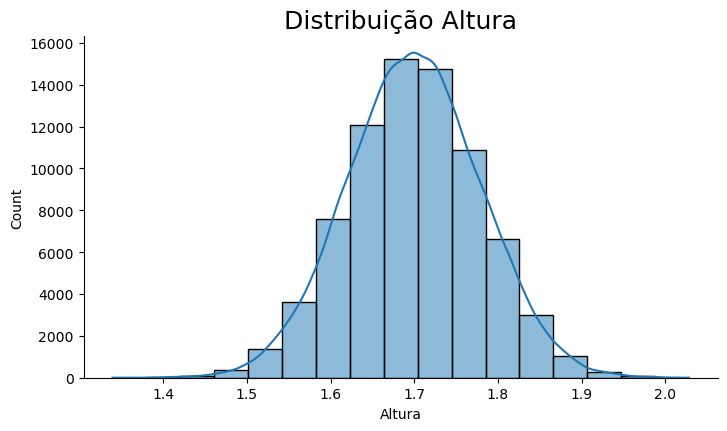

In [102]:
# Check Visal - Histograma
ax = sns.displot(altura, kde=True, bins=k_sturges(altura))

ax.figure.set_size_inches(8, 4)
plt.title("Distribuição Altura", fontsize=18)
plt.show()

In [103]:
# Teste para renda
teste_de_normalidade(renda, significancia)

p_value: 0.0

                O p_value (0.0) é MENOR que o nível de significânia (0.05), portanto, rejeitamos HO e concluímos com um nível de 95.0% de confiança que a distribuição dos dados NÃO apresenta uma distribuição normal.
            


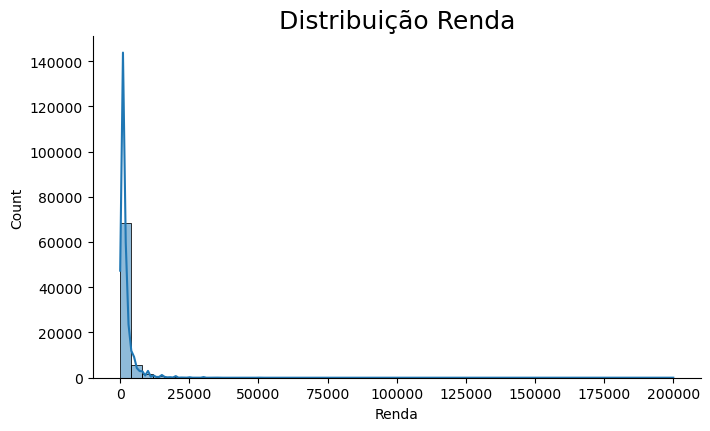

In [104]:
# Check Visal - Histograma
ax = sns.displot(renda, kde=True, bins=50)

ax.figure.set_size_inches(8, 4)
plt.title("Distribuição Renda", fontsize=18)
plt.show()

---

# 4.3 Testes Paramétricos

Testes paramétricos são métodos estatísticos que assumem que os dados seguem uma certa distribuição, geralmente a distribuição normal. Esses testes são usados para fazer inferências sobre os parâmetros da população (como média e variância) a partir de amostras.

### Passos

#### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$
#### **Passo 2** - escolha da distribuição amostral adequada
#### **Passo 3** - fixação da significância do teste ($\alpha$)
#### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
#### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

#### <font color='red'>Base PNAD 2015 para gerar amostra.</font>

In [105]:
# Dados
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [106]:
# Dados
amostra = altura.copy()

# Teste Bicaudal

### <font color='red'>Formulação das Hipóteses</font>

> ### $H_0: \mu = 1.70$
> ### $H_1: \mu \neq 1.70$

In [107]:
# 1- Definição da hipótese
media = 1.7

# 2- Definição da distribuição - se n>30, normal, t-student
n = len(amostra)

# 3- Definição do nível de significância
significancia = 0.05
confianca = 1 - significancia
probabilidade = (0.5 + (confianca / 2))
z_score = stats.norm.ppf(probabilidade)

# 4- Cálculo estatística teste
media_amostral = np.mean(amostra)
desvio_padrao_amostral = np.std(amostra, ddof=1)
z_observado = (media_amostral - media) / (desvio_padrao_amostral / np.sqrt(n))

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [108]:
# 5- Aceitação ou rejeição da hipótese nula
z_observado <= -z_score or z_observado >= z_score

False

In [109]:
# Função para teste de normalidade
def teste_de_hipotese(z_observado, z_score, significancia):
    print(f"z_observado: {z_observado.round(2)}")
    print(f"z_score de confiança: {z_score.round(2)}")

    if z_observado <= -z_score or z_observado >= z_score:
        print(f"""
        O valor da estatístiza z observada {abs(z_observado.round(2))} é MAIOR que o valor absoluto da estatística de referência ({z_score.round(2)}), portanto, rejeitamos a HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a média é DIFERENTE de {media}.
            """)        
    else:
        print(f"""
        O valor da estatístiza z observada {abs(z_observado.round(2))} é MENOR que o valor absoluto da estatística de referência ({z_score.round(2)}), portanto, NÂO rejeitamos a HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a média é IGUAL a {media}.
            """)        

In [110]:
teste_de_hipotese(z_observado, z_score, significancia)

z_observado: -1.7
z_score de confiança: 1.96

        O valor da estatístiza z observada 1.7 é MENOR que o valor absoluto da estatística de referência (1.96), portanto, NÂO rejeitamos a HO e concluímos com um nivel de confianca de 95.0% que a media é IGUAL a 1.7.
            


### <font color='red'>Critério do Intervalo de Confiança</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor estiver fora do intervalo definido por $\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$

In [111]:
# Intervlo de confiaça usando statsmodel
sigma = desvio_padrao_amostral / np.sqrt(n)
conf_interval = stats.norm.interval(confidence=confianca, loc=media_amostral, scale=sigma)

conf_interval = (conf_interval[0].round(4), conf_interval[1].round(4))
conf_interval

(1.6989, 1.7001)

In [112]:
# 5- Aceitação ou rejeição da hipótese nula
media >= conf_interval[0] and media <= conf_interval[1]

True

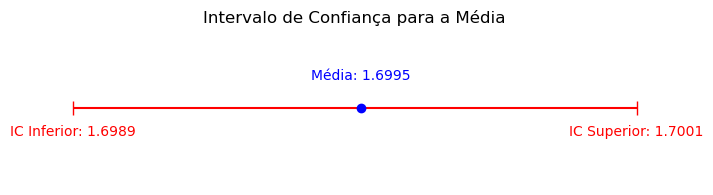

In [113]:
# Plotar a média amostral e o intervalo de confiança
plt.figure(figsize=(8, 2))
plt.errorbar(
    media_amostral, 1, 
    xerr=[[media_amostral - conf_interval[0]], 
          [conf_interval[1] - media_amostral]], 
    fmt='o', color='blue', ecolor='red', capsize=5)

# Adicionar valores no gráfico
plt.text(media_amostral, 1.02, f'Média: {media_amostral:.4f}', ha='center', color='blue')
plt.text(conf_interval[0], 0.98, f'IC Inferior: {conf_interval[0]:.4f}', ha='center', color='red')
plt.text(conf_interval[1], 0.98, f'IC Superior: {conf_interval[1]:.4f}', ha='center', color='red')

plt.title('Intervalo de Confiança para a Média')
plt.xlabel('Valor')
plt.yticks([])
plt.axis('off')
plt.show()

In [114]:
# Função para intervalo de confiança
def intervalo_de_confianca(media, conf_interval, significancia):
    print(f"Media: {media}")
    print(f"Intervalo de confiança: {conf_interval}")

    if media >= conf_interval[0] and media <= conf_interval[1]:
        print(f"""
        O intervalo de confiança {conf_interval} CONTÉM a média ({media}), portanto, NÂO rejeitamos a HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a media é IGUAL a {media}.
            """)
    else:
        print(f"""
        O intervalo de confiança {conf_interval} NÂO CONTÉM, a média ({media}), portanto, rejeitamos a HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a media é DIFERENTE de {media}.
            """)

In [115]:
intervalo_de_confianca(media, conf_interval, significancia)

Media: 1.7
Intervalo de confiança: (1.6989, 1.7001)

        O intervalo de confiança (1.6989, 1.7001) CONTÉM a média (1.7), portanto, NÂO rejeitamos a HO e concluímos com um nivel de confianca de 95.0% que a media é IGUAL a 1.7.
            


### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [116]:
# 5- Aceitação ou rejeição da hipótese nula
p_valor = 2 * (1 - stats.norm.cdf(abs(z_observado)))
# ou
p_valor = 2 * (stats.norm.sf(abs(z_observado)))

p_valor <= significancia

False

In [117]:
# Função para teste de normalidade
def teste_hipoteses_p_value(media, p_valor, significancia):
    print(f"p_value: {p_valor.round(4)}")
    print(f"significancia: {significancia}")

    if p_valor <= significancia:
        print(f"""
        O p_value ({p_valor.round(4)}) é MENOR que o nível de significânia ({significancia}), portanto, rejeitamos HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a media é diferente de {media}.
            """)
    else:
        print(f"""
        O p_value ({p_valor.round(4)}) é MAIOR que o nível de significânia ({significancia}), portanto, NÃO rejeitamos HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a media é igual de {media}.
            """)

In [118]:
teste_hipoteses_p_value(media, p_valor, significancia)

p_value: 0.09
significancia: 0.05

        O p_value (0.09) é MAIOR que o nível de significânia (0.05), portanto, NÃO rejeitamos HO e concluímos com um nivel de confianca de 95.0% que a media é igual de 1.7.
            


# Teste Unicaudal

### Passos

#### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$
#### **Passo 2** - escolha da distribuição amostral adequada
#### **Passo 3** - fixação da significância do teste ($\alpha$)
#### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste
#### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Formulação das Hipóteses</font>

> ### $H_0: \mu \leq 1.70$
> ### $H_1: \mu > 1.70$

In [119]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

amostra = altura.copy()

In [120]:
# 1- Definição da hipótese
media = 1.70

# 2- Definição da distribuição - se n>30, normal, t-student
n = len(amostra)
graus_de_liberdade = n - 1

# 3- Definição do nível de significância
significancia = 0.05
confianca = 1 - significancia
t_alpha = stats.t.ppf(confianca, graus_de_liberdade)

#probabilidade = (0.5 + (confianca / 2))
#z_score = stats.norm.ppf(probabilidade)

# 4- Cálculo estatística teste
media_amostral = np.mean(amostra)
desvio_padrao_amostral = np.std(amostra, ddof=1)
#z_observado = (media_amostral - media) / (desvio_padrao_amostral / np.sqrt(n))
t_observado = (media_amostral - media) / (desvio_padrao_amostral / np.sqrt(n))

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [121]:
# Função para teste de normalidade
def th_unilateral_superior(estatistica_observada, estatistica_score, significancia, media):
    print(f"Observado: {estatistica_observada.round(2)}")
    print(f"Score: {estatistica_score.round(2)}")

    if estatistica_observada > estatistica_score:
        print(f"""
        O valor da estatística observada ({estatistica_observada.round(2)}) é MAIOR que o valor da estatística de referência ({estatistica_score.round(2)}), portanto, rejeitamos a HO e concluímos com um nivel de confiança de {(1-significancia)*100}% que a media é MAIOR QUE {media}.
            """)        
    else:
        print(f"""
        O valor da estatística observada ({estatistica_observada.round(2)}) é MENOR que o valor da estatística de referência ({estatistica_score.round(2)}), portanto, NÂO rejeitamos a HO e concluímos com um nivel de confiança de {(1-significancia)*100}% que a media é MENOR OU IGUAL a {media}.
            """)

In [122]:
th_unilateral_superior(t_observado, t_alpha, significancia, media)

Observado: -1.7
Score: 1.64

        O valor da estatística observada (-1.7) é MENOR que o valor da estatística de referência (1.64), portanto, NÂO rejeitamos a HO e concluímos com um nivel de confiança de 95.0% que a media é MENOR OU IGUAL a 1.7.
            


### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [123]:
p_valor = stats.t.sf(t_observado, df = graus_de_liberdade)

In [124]:
def th_unilateral_p_value(media, p_valor, significancia):
    print(f"p_value: {p_valor.round(4)}")
    print(f"significancia: {significancia}")

    if p_valor <= significancia:
        print(f"""
        O p_value ({p_valor.round(4)}) é MENOR que o nível de significânia ({significancia}), portanto, rejeitamos HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a média é MAIOR QUE {media}.
            """)
    else:
        print(f"""
        O p_value ({p_valor.round(4)}) é MAIOR que o nível de significânia ({significancia}), portanto, NÃO rejeitamos HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a média é MENOR OU IGUAL a {media}.
            """)

In [125]:
th_unilateral_p_value(media, p_valor, significancia)

p_value: 0.955
significancia: 0.05

        O p_value (0.955) é MAIOR que o nível de significânia (0.05), portanto, NÃO rejeitamos HO e concluímos com um nivel de confianca de 95.0% que a média é MENOR OU IGUAL a 1.7.
            


# Teste para duas amostras

### Passos e variáveis para o teste pra duas amostras

1 - A partir das duas séries dos dados extrair, média, desvio-padrão e tamanho da amostra.

2 - Definir nível de significância e D_0 (diferença entre as médias populacionais)

3 - Calcular a estatística z

  * Para médias
### $z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

  * Para proporções
### $z = \frac{(\hat{p_1} - \hat{p_2})-D_0}{\sqrt{\hat{p_1}(1-\hat{p_1})(\frac{1}{n_1} + \frac{1}{n_2}})}$

4 - Comparar z_observado com o z no nível de significância

5 - Rejeitar H0 de acordo com o tipo de teste

### Formulação das hipóteses $H_0$ e $H_1$

#### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
#### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

## <font color='red'>Problema</font>

Extrair duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres** do dataset PNAD-2015. Comprovar se há desigualdade de renda entre homens e mulheres. **Testar a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

In [126]:
# Amostras
homens = dados.query('Sexo == 0').sample(n=500, random_state=101).Renda
mulheres = dados.query('Sexo == 1').sample(n=500, random_state=101).Renda

# Média e desvio-padrão para homens
media_homens = homens.mean()
desvio_padrao_homens = homens.std()

# Média e desvio padrão para mulheres
media_mulheres = mulheres.mean()
desvio_padrao_mulheres = mulheres.std()

In [127]:
# Parâmetros para o teste
significancia = 0.01
confianca = 1 - significancia
n_H = len(homens)
n_M = len(mulheres)
D_0 = 0

In [133]:
# Calculando z para nível de confianca
probabilidade = confianca
z_alpha = stats.norm.ppf(probabilidade)

z_alpha

2.3263478740408408

In [134]:
# Cálculo z observado
numerador = (media_homens - media_mulheres) - D_0
denominador = np.sqrt((desvio_padrao_homens ** 2 / n_H) + (desvio_padrao_mulheres ** 2 / n_M))
z = numerador / denominador

z >= z_alpha

True

In [136]:
# Usando p_value
# 5- Aceitação ou rejeição da hipótese nula
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))
# ou
p_valor = 2 * (stats.norm.sf(abs(z)))

print(f"p_valor: {p_valor}")
p_valor <= significancia

p_valor: 4.4745735718917486e-09


True

In [139]:
# Melhorar função para realizar os 3 tipos de testes

def th_duas_mostras_p_value(p_valor, significancia):
    print(f"p_value: {p_valor.round(4)}")
    print(f"significancia: {significancia}")

    if p_valor <= significancia:
        print(f"""
        O p_value ({p_valor.round(4)}) é MENOR que o nível de significânia ({significancia}), portanto, rejeitamos HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a média do grupo 1 é MAIOR QUE OU IGUAL a média do grupo 2.
            """)
    else:
        print(f"""
        O p_value ({p_valor.round(4)}) é MAIOR que o nível de significânia ({significancia}), portanto, NÃO rejeitamos HO e concluímos com um nivel de confianca de {(1-significancia)*100}% que a média do grupo 1 é MENOR a média do grupo 2.
            """)

In [138]:
th_duas_mostras_p_value(p_valor, significancia)

p_value: 0.0
significancia: 0.01

        O p_value (0.0) é MENOR que o nível de significânia (0.01), portanto, rejeitamos HO e concluímos com um nivel de confianca de 99.0% que a média do grupo 1 é MAIOR QUE OU IGUAL a média do grupo 2.
            


In [129]:
# Usando statsmodels
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [130]:
test_H = DescrStatsW(homens)
test_M = DescrStatsW(mulheres)

test_A = test_H.get_compare(test_M)
z, p_valor = test_A.ztest_ind(alternative='larger', value=0)

test_B = CompareMeans(test_H, test_M)
z, p_valor = test_B.ztest_ind(alternative='larger', value=0)

In [131]:
p_valor <= significancia

True

**Conclusão:** Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.

# 4.4 Testes não Paramétricos

---

## <font size = 7> 5 - Regressão</font>

# Regressão Linear

# Séries Temporais

---